<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with artificially oversampled data
Authorship: Raul Macedo

Creates ANN for data artificially oversampled with SMOTE on `oversampling.ipynb`

In [1]:
#General imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from utils import train_model_if_doesnt_exist,save_csv_if_doesnt_exist

In [2]:

train1_fill = pd.read_csv('./oversampling/oversampling_with_artificial_data/train_data_fill1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train2_fill = pd.read_csv('./oversampling/oversampling_with_artificial_data/train_data_fill2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train3_fill = pd.read_csv('./oversampling/oversampling_with_artificial_data/train_data_fill3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

test1_fill = pd.read_csv('./feature_selection_results/test1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test2_fill = pd.read_csv('./feature_selection_results/test2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test3_fill = pd.read_csv('./feature_selection_results/test3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

In [3]:
train_in1_art = train1_fill.drop(columns=['class'])
train_out1_art = pd.DataFrame(train1_fill['class'])
train_in2_art = train2_fill.drop(columns=['class'])
train_out2_art = pd.DataFrame(train2_fill['class'])
train_in3_art = train3_fill.drop(columns=['class'])
train_out3_art = pd.DataFrame(train3_fill['class'])

test_in1_art = test1_fill.drop(columns=['class'])
test_out1_art = pd.DataFrame(test1_fill['class'])

test_in2_art = test2_fill.drop(columns=['class'])
test_out2_art = pd.DataFrame(test2_fill['class'])

test_in3_art = test3_fill.drop(columns=['class'])
test_out3_art = pd.DataFrame(test3_fill['class'])

In [4]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1_art)
test_in1n,scaler_test_in1n = normalize_data(test_in1_art)
train_out1n,scaler_train_out1n = normalize_data(train_out1_art)
test_out1n,scaler_test_out1n = normalize_data(test_out1_art)

train_in2n,scaler_train_in2n = normalize_data(train_in2_art)
test_in2n,scaler_test_in2n = normalize_data(test_in2_art)
train_out2n,scaler_train_out2n = normalize_data(train_out2_art)
test_out2n,scaler_test_out2n = normalize_data(test_out2_art)

train_in3n,scaler_train_in3n = normalize_data(train_in3_art)
test_in3n,scaler_test_in3n = normalize_data(test_in3_art)
train_out3n,scaler_train_out3n = normalize_data(train_out3_art)
test_out3n,scaler_test_out3n = normalize_data(test_out3_art)


train_out1n_art = np.ravel(train_out1n)
train_out2n_art = np.ravel(train_out2n)
train_out3n_art = np.ravel(train_out3n)


## **Case 1: Using GridSearchCV to determine MLP parameters and train model**

In [5]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

ultron_art1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/after_data_filling/artificially_filled/ultron_art1_PRP.pkl')


In [6]:
ultron_art1

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 4, 4), max_iter=100)

In [7]:
ultron_art1.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (6, 4, 4),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

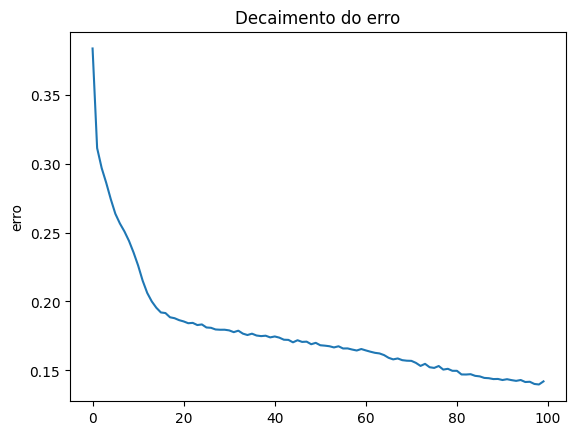

In [8]:
plt.plot(ultron_art1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')


### **Analising model with test data - case 1**

In [9]:
out1_pred = ultron_art1.predict(test_in1n)

In [10]:
out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_test_out1n.inverse_transform(out1_pred_df)

In [11]:
def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    sns.set(font_scale=2)
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observed')
    plt.ylabel('Predict')
    return

def save_classifaction_report(observed_data,predicted_data,file_name:str):
    cls_report = classification_report(observed_data,predicted_data,output_dict=True)
    cls_report_df = pd.DataFrame(cls_report)
    accuracy = accuracy_score(observed_data,predicted_data)
    cls_report_df['accuracy'] = accuracy
    save_csv_if_doesnt_exist(cls_report_df,file_name)
    print(cls_report_df)
    return

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.617278      0.992963  0.940267       0.805121       0.958162
recall         0.934692      0.940836  0.940267       0.937764       0.940267
f1-score       0.743526      0.966197  0.940267       0.854862       0.945570
support    10060.000000  98540.000000  0.940267  108600.000000  108600.000000


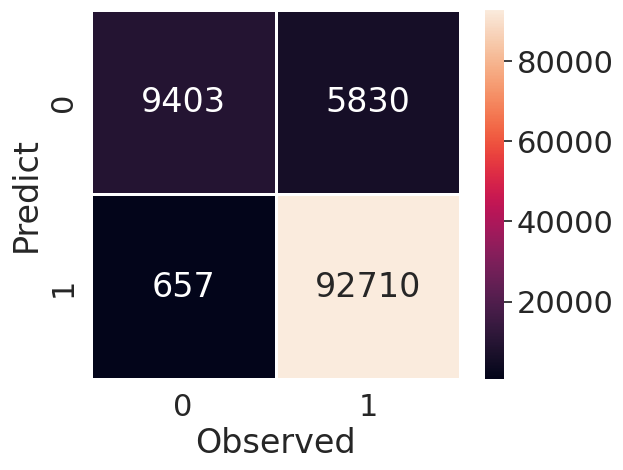

In [12]:
save_classifaction_report(test_out1_art,out_des_pred1,'./ann_models/after_data_filling/artificially_filled/reports/ultron_art1_test_report.csv')
plot_confusion_matrix(test_out1_art,out_des_pred1)

### **Analising model with train data - case 1**

                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.874970       0.936600  0.923609       0.905785       0.922149
recall         0.786610       0.965571  0.923609       0.876090       0.923609
f1-score       0.828441       0.950865  0.923609       0.889653       0.922159
support    70425.000000  229923.000000  0.923609  300348.000000  300348.000000


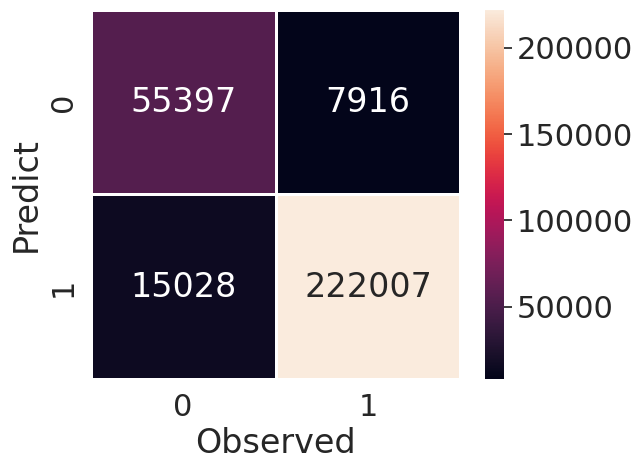

In [13]:
out1_pred = ultron_art1.predict(train_in1n)
out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_train_out1n.inverse_transform(out1_pred_df)

save_classifaction_report(train_out1_art,out_des_pred1,'./ann_models/after_data_filling/artificially_filled/reports/ultron_art1_train_report.csv')
plot_confusion_matrix(train_out1_art,out_des_pred1)

# **Case 2 - Taking away T-TPT & P-MON-CKP**
## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [14]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(4,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron_art2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/after_data_filling/artificially_filled/ultron_art2_PRP.pkl')

In [15]:
ultron_art2.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (4, 6),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

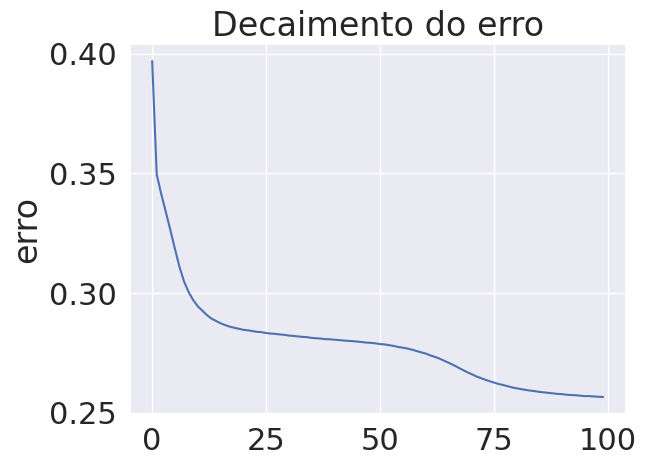

In [16]:
plt.plot(ultron_art2.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 2**

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.891502      0.948349  0.945589       0.919926       0.943095
recall         0.468267      0.994197  0.945589       0.731232       0.945589
f1-score       0.614018      0.970732  0.945589       0.792375       0.937764
support    10037.000000  98563.000000  0.945589  108600.000000  108600.000000


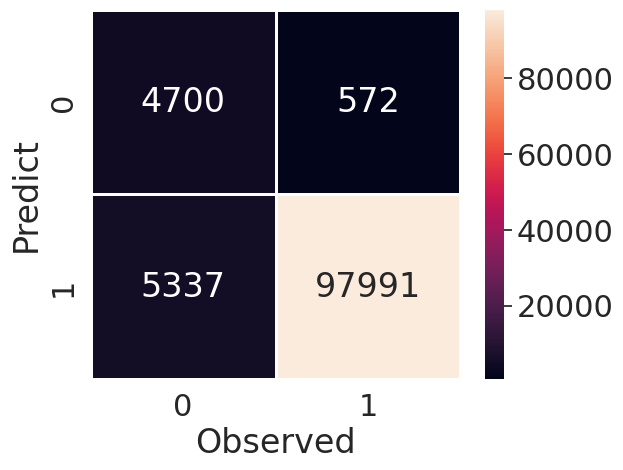

In [17]:

out2_pred = ultron_art2.predict(test_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_test_out2n.inverse_transform(out2_pred_df)

save_classifaction_report(test_out2_art,out_des_pred2,'./ann_models/after_data_filling/artificially_filled/reports/ultron_art2_test_report.csv')
plot_confusion_matrix(test_out2_art,out_des_pred2)


### **Analising model with train data - case 2**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.961544       0.857420  0.869129       0.909482       0.881855
recall         0.460748       0.994350  0.869129       0.727549       0.869129
f1-score       0.622980       0.920822  0.869129       0.771901       0.850927
support    70494.000000  229900.000000  0.869129  300394.000000  300394.000000


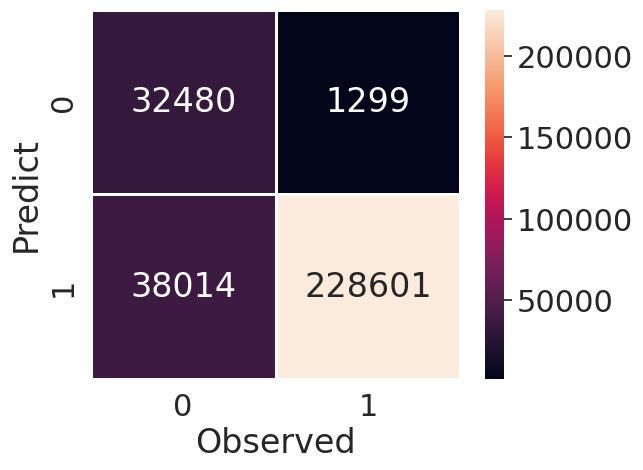

In [18]:
out2_pred = ultron_art2.predict(train_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_train_out2n.inverse_transform(out2_pred_df)

save_classifaction_report(train_out2_art,out_des_pred2,'./ann_models/after_data_filling/artificially_filled/reports/ultron_art2_train_report.csv')

plot_confusion_matrix(train_out2_art,out_des_pred2)



# Case 3: Desconsiderando P-TPT e P-MON-CKP
### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [19]:
ultron_art3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters2,'./ann_models/after_data_filling/artificially_filled/ultron_art3_PRP.pkl')

In [20]:
ultron_art3.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (4, 4, 4),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

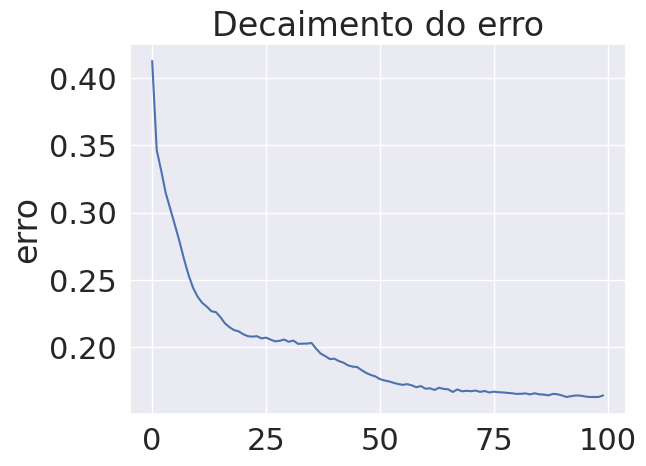

In [21]:
plt.plot(ultron_art3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**

                   0.0           5.0  accuracy      macro avg   weighted avg
precision     0.604656      0.979956  0.933794       0.792306       0.945447
recall        0.808832      0.946448  0.933794       0.877640       0.933794
f1-score      0.691998      0.962911  0.933794       0.827454       0.938000
support    9986.000000  98614.000000  0.933794  108600.000000  108600.000000


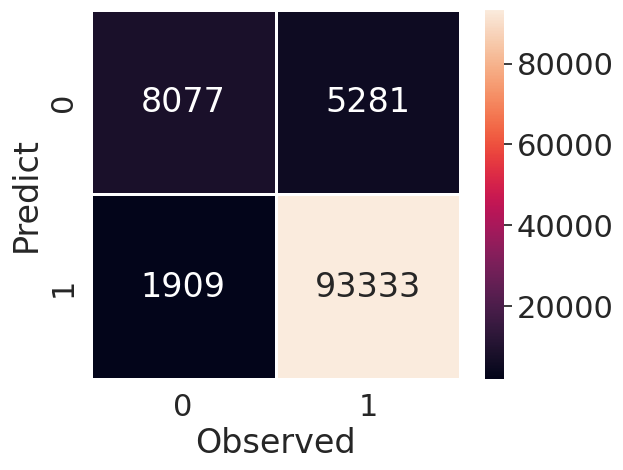

In [22]:
out3_pred = ultron_art3.predict(test_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_test_out3n.inverse_transform(out3_pred_df)

save_classifaction_report(test_out3_art,out_des_pred3,'./ann_models/after_data_filling/artificially_filled/reports/ultron_art3_test_report.csv')
plot_confusion_matrix(test_out3_art,out_des_pred3)

### **Analising model with train data - case 3**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.827023       0.938490  0.913213       0.882757       0.912284
recall         0.797698       0.948719  0.913213       0.873208       0.913213
f1-score       0.812096       0.943577  0.913213       0.877836       0.912665
support    70647.000000  229849.000000  0.913213  300496.000000  300496.000000


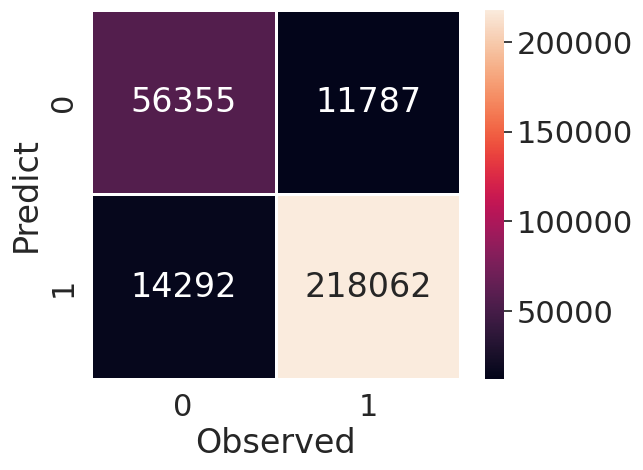

In [23]:
out3_pred = ultron_art3.predict(train_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_train_out3n.inverse_transform(out3_pred_df)

save_classifaction_report(train_out3_art,out_des_pred3,'./ann_models/after_data_filling/artificially_filled/reports/ultron_art3_train_report.csv')
plot_confusion_matrix(train_out3_art,out_des_pred3)

# ROC Curve

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score


In [25]:
y_pred_prob_ultron1 = ultron_art1.predict_proba(test_in1n)[:, 1]
y_pred_prob_ultron2 = ultron_art2.predict_proba(test_in2n)[:, 1]
y_pred_prob_ultron3 = ultron_art3.predict_proba(test_in3n)[:, 1]

In [32]:
fpr1, tpr1, thresholds1 = roc_curve(test_out1n, y_pred_prob_ultron1)  
roc_auc1 = roc_auc_score(test_out1n, y_pred_prob_ultron1)  

fpr2, tpr2, thresholds2 = roc_curve(test_out2n, y_pred_prob_ultron2)
roc_auc2 = roc_auc_score(test_out2n, y_pred_prob_ultron2) 

fpr3, tpr3, thresholds3 = roc_curve(test_out3n, y_pred_prob_ultron3)
roc_auc3 = roc_auc_score(test_out3n, y_pred_prob_ultron3) 

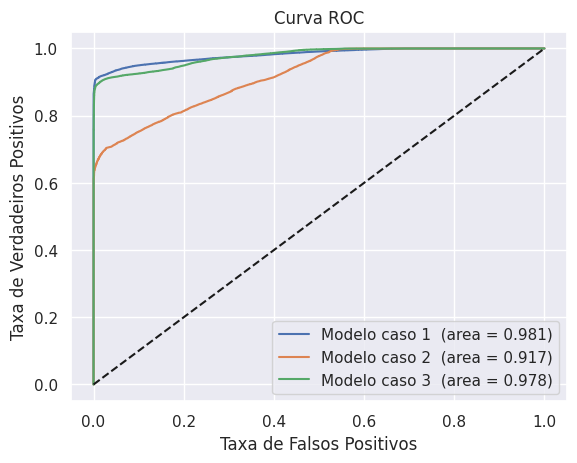

In [38]:
sns.set(font_scale=1)

plt.plot(fpr1, tpr1, label=f'Modelo caso 1  (area = {round(roc_auc1,3)})')
plt.plot(fpr2, tpr2, label=f'Modelo caso 2  (area = {round(roc_auc2,3)})')
plt.plot(fpr3, tpr3, label=f'Modelo caso 3  (area = {round(roc_auc3,3)})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show() 
